<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/TrendingYouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trending YouTube Video Statistics


1. เก็บและรวบรวมข้อมูลดิบ เลือกข้อมูลจากแหล่ง kaggle.com โจทย์คือข้อมูลเกี่ยวการสถิติการเข้าชม YouTube เลื่อกเฉพาะ GB และ US

In [ ]:
import numpy as np
import pandas as pd
import json
df_US = pd.read_csv('/content/USvideos.csv', sep=",")
df_GB = pd.read_csv('/content/GBvideos.csv', sep=",")
df_json_US = pd.read_json('/content/US_category_id.json', orient='columns')
df_json_GB = pd.read_json('/content/GB_category_id.json', orient='columns')

In [ ]:
df_US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [ ]:
df_US['Country'] = 'US'
df_GB['Country'] = 'GB'

In [ ]:
df_US['category_id'] = df_US['category_id'].astype(str)

category_id = {}

with open('/content/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

df_US.insert(4, 'category', df_US['category_id'].map(category_id))
category_list_US = df_US['category'].unique()
category_list_US

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [ ]:
df_GB['category_id'] = df_GB['category_id'].astype(str)

category_id = {}

with open('/content/GB_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

df_GB.insert(4, 'category', df_GB['category_id'].map(category_id))
category_list_GB = df_GB['category'].unique()
category_list_GB

array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
       'News & Politics', 'People & Blogs', 'Comedy',
       'Science & Technology', 'Pets & Animals', 'Education',
       'Film & Animation', 'Gaming', 'Autos & Vehicles',
       'Travel & Events', nan, 'Shows'], dtype=object)

In [ ]:
df_US

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


In [ ]:
df_all = pd.concat([df_US,df_GB], axis=0)

In [ ]:
df_all['trending_date'] = pd.to_datetime(df_all['trending_date'], errors='coerce', format='%y.%d.%m')
df_all['publish_time'] = pd.to_datetime(df_all['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

สำรวจข้อมูลดิบคร่าวๆ ว่าเพียงพอไหม มี missing value หรือเปล่า
1. มี Feature อะไรบ้าง
2. มีกี่แถว กี่คอร์ลัมภํ
3. ดูตัวอย่างข้อมูลแต่ละคอร์ลัมภ์
4. แต่ละ Feature มีข้อมูลอะไรบ้าง

In [ ]:
df_all.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country'],
      dtype='object')

In [ ]:
df_all.shape

(79865, 18)

In [ ]:
df_all.tail(5)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,10,2018-05-09 07:00:01,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,10,2018-05-11 17:09:16,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,10,2018-05-08 11:05:08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,GB
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,24,2018-05-08 20:32:32,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB
38915,4YFo4bdMO8Q,2018-06-14,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,Music,10,2018-05-11 04:06:35,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...,GB


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79865 entries, 0 to 38915
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                79865 non-null  object        
 1   trending_date           79865 non-null  datetime64[ns]
 2   title                   79865 non-null  object        
 3   channel_title           79865 non-null  object        
 4   category                79775 non-null  object        
 5   category_id             79865 non-null  object        
 6   publish_time            79865 non-null  datetime64[ns]
 7   tags                    79865 non-null  object        
 8   views                   79865 non-null  int64         
 9   likes                   79865 non-null  int64         
 10  dislikes                79865 non-null  int64         
 11  comment_count           79865 non-null  int64         
 12  thumbnail_link          79865 non-null  object

ตรวจข้อมูลว่ามีค่า missing value หรือไม่

In [ ]:
df_all.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category                    90
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1182
Country                      0
dtype: int64

เนื่องจากเป็นค่าจริง replace ค่า description ด้วย - แต่จะนำค่าอื่นๆ ไปวิเคราะห์ต่อ

และจะ clean ข้อมูล Category ด้วยการตัดออก

In [ ]:
df_all.description.fillna(value='-', inplace=True)

In [ ]:
df_all.isnull().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category                  90
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description                0
Country                    0
dtype: int64

In [ ]:
df_all.dropna(subset=['category'], inplace=True)

In [ ]:
df_all.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category                  0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
Country                   0
dtype: int64

2. ตั้งคำถาม และสมมติฐาน


1. อยากรู้ว่าแต่ละกลุ่ม (Category_id) มีจำนวนเท่าใด เรียงลำดับมากไปน้อย

<Axes: >

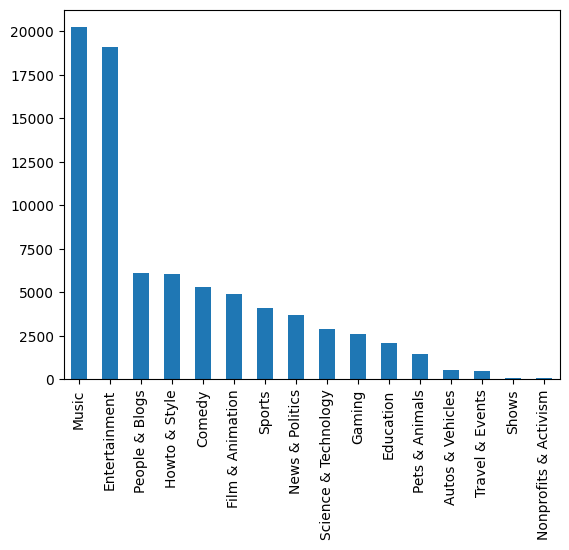

In [ ]:
df_all['category'].value_counts().plot.bar()

In [ ]:
df_all['category'].value_counts()

Music                    20226
Entertainment            19088
People & Blogs            6136
Howto & Style             6074
Comedy                    5285
Film & Animation          4922
Sports                    4081
News & Politics           3712
Science & Technology      2919
Gaming                    2605
Education                 2113
Pets & Animals            1454
Autos & Vehicles           528
Travel & Events            498
Shows                       77
Nonprofits & Activism       57
Name: category, dtype: int64

In [ ]:
gdat = df_all.groupby(by='category').mean()
gdat.describe()

<ipython-input-22-d31797fb94b7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdat = df_all.groupby(by='category').mean()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2.158369e+06,66019.130089,6307.028843,11074.069607,0.020638,0.010026,0.000557
std,2.338610e+06,77011.720100,14054.035480,20054.777337,0.021410,0.017824,0.001350
min,7.690111e+05,11576.291165,401.350649,2067.646586,0.000000,0.000000,0.000000
25%,9.419309e+05,24654.493931,974.740110,3211.714459,0.002084,0.000202,0.000000
50%,1.605213e+06,40854.971983,2194.381687,5347.247797,0.019782,0.003353,0.000000
75%,2.083562e+06,64453.559730,3868.102010,7578.550489,0.027616,0.009426,0.000123
max,1.044664e+07,259923.614035,58076.859649,84364.859649,0.070175,0.070175,0.005079


category_id ที่มียอดวิวมากที่สุด เรียงจากมากไปหาน้อย

In [ ]:
gdat.sort_values(by=['dislikes'], ascending=False)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category,,,,,,,
Nonprofits & Activism,2.963884e+06,259923.614035,58076.859649,84364.859649,0.070175,0.070175,0.000000
Music,1.044664e+07,255108.851775,10409.831108,20681.772768,0.002175,0.002620,0.001088
Entertainment,2.639914e+06,66784.509744,6867.865360,9978.202955,0.024570,0.004086,0.002253
Gaming,1.492452e+06,53421.831862,4410.335509,8025.991171,0.028791,0.004607,0.000000
Sports,1.898111e+06,42516.466062,3687.357510,5206.660377,0.017888,0.006861,0.000490
People & Blogs,1.739159e+06,52479.179922,3616.439211,7087.871741,0.021675,0.013038,0.000000
Film & Animation,3.178965e+06,63676.576392,2492.499390,6801.517879,0.027225,0.027428,0.005079
Comedy,1.717973e+06,68064.129044,2244.259603,7429.403595,0.000378,0.000000,0.000000
News & Politics,7.766425e+05,13147.251616,2144.503772,4155.721175,0.056034,0.000269,0.000000


เลือกข้อมูลก่อนเอาเข้าโมเดล K-Mean

In [ ]:
select_dat = pd.DataFrame(data=df_all,columns=['views','likes','dislikes','comment_count', 'comments_disabled', 'ratings_disabled'])
select_dat

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,748374,57527,2966,15954,False,False
1,2418783,97185,6146,12703,False,False
2,3191434,146033,5339,8181,False,False
3,343168,10172,666,2146,False,False
4,2095731,132235,1989,17518,False,False
...,...,...,...,...,...,...
38911,25066952,268088,12783,9933,False,False
38912,1492219,61998,13781,24330,False,False
38913,29641412,394830,8892,19988,False,False
38914,14317515,151870,45875,26766,False,False


In [ ]:
# แบ่ง cluster ด้วย K-means
from sklearn.cluster import KMeans
datcluster = KMeans(n_clusters=3, random_state=0).fit_predict(select_dat)
df_all['cluster_number'] = datcluster
df_all

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,cluster_number
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,10,2018-05-09 07:00:01,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB,2
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,10,2018-05-11 17:09:16,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB,2
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,10,2018-05-08 11:05:08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,GB,0
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,24,2018-05-08 20:32:32,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

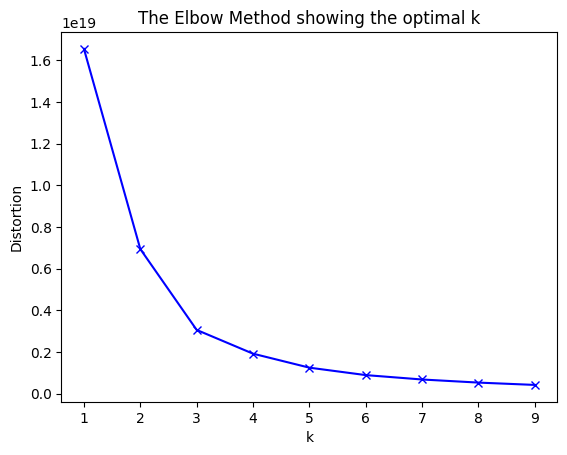

In [ ]:
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(select_dat)
    distortions.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
df_all.groupby(by='cluster_number').mean()

<ipython-input-31-e4fa39493171>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all.groupby(by='cluster_number').mean()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
cluster_number,,,,,,,
0,5.271566e+07,1.023650e+06,69853.735570,106010.249137,0.024174,0.022694,0.006413
1,2.074792e+08,2.992443e+06,267865.887255,257283.946078,0.000000,0.000000,0.000000
2,2.285255e+06,7.178196e+04,3179.530615,7482.113703,0.016339,0.005094,0.001019


In [ ]:
cluster2 = df_all[df_all['cluster_number']== 2]
cluster2.groupby(by='category').mean()


<ipython-input-32-7260c221c705>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster2.groupby(by='category').mean()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,cluster_number
category,,,,,,,,
Autos & Vehicles,1.391809e+06,14752.426136,992.803030,2442.295455,0.024621,0.018939,0.000000,2.0
Comedy,1.668568e+06,66531.320068,2201.379951,7355.361380,0.000379,0.000000,0.000000,2.0
Education,7.690111e+05,31625.729295,920.551349,3350.281590,0.007572,0.002366,0.000000,2.0
Entertainment,1.974060e+06,51808.275564,3138.075882,6569.868188,0.024887,0.004139,0.001592,2.0
Film & Animation,2.779422e+06,58202.736853,2309.192276,6363.314092,0.027527,0.027732,0.005136,2.0
Gaming,1.492452e+06,53421.831862,4410.335509,8025.991171,0.028791,0.004607,0.000000,2.0
Howto & Style,8.455676e+05,35130.752924,1137.984187,5013.694449,0.001812,0.001812,0.000000,2.0
Music,4.417551e+06,154241.105934,4830.193195,12236.753293,0.002232,0.002885,0.001198,2.0
News & Politics,7.766425e+05,13147.251616,2144.503772,4155.721175,0.056034,0.000269,0.000000,2.0


In [ ]:
cluster2.groupby(by='Country').mean()

<ipython-input-33-7fc87fb1d486>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster2.groupby(by='Country').mean()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,cluster_number
Country,,,,,,,,
GB,2.855431e+06,85618.074569,3790.47173,8418.403179,0.017354,0.006342,0.001511,2.0
US,1.763490e+06,59120.630214,2620.46314,6625.322467,0.015411,0.003951,0.000568,2.0


In [ ]:
tag2 = cluster2['tags']
tag2

0                                          SHANtell martin
1        last week tonight trump presidency|"last week ...
2        racist superman|"rudy"|"mancuso"|"king"|"bach"...
3        rhett and link|"gmm"|"good mythical morning"|"...
4        ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
                               ...                        
38910    Jeremy|"Zucker"|"all"|"the"|"kids"|"are"|"depr...
38911    Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...
38912    jacob sartorius|"jacob"|"up with it"|"jacob sa...
38914    Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...
38915    Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...
Name: tags, Length: 77544, dtype: object

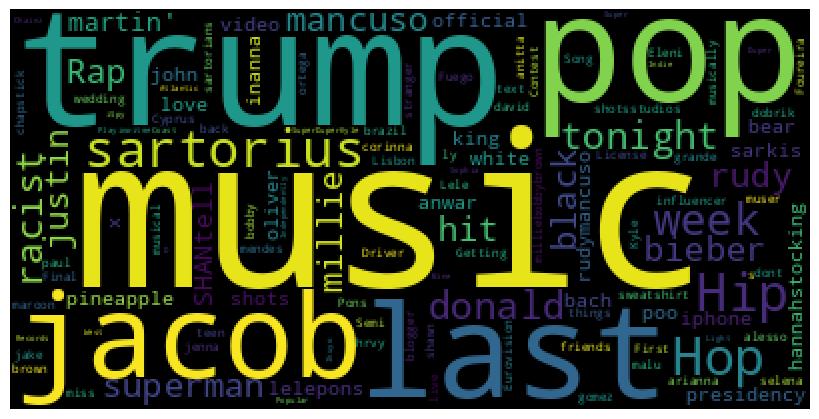

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = tag2.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
cluster1 = df_all[df_all['cluster_number']== 1]
cluster1.groupby(by='category').mean()

title1 = cluster1['title']
title1

<ipython-input-37-6e15736abcd8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster1.groupby(by='category').mean()


5935     YouTube Rewind: The Shape of 2017 | #YouTubeRe...
6181     YouTube Rewind: The Shape of 2017 | #YouTubeRe...
34708                 Ariana Grande - No Tears Left To Cry
34888    Becky G, Natti Natasha - Sin Pijama (Official ...
35265    Childish Gambino - This Is America (Official V...
                               ...                        
37705    Childish Gambino - This Is America (Official V...
37879    Childish Gambino - This Is America (Official V...
38056    Childish Gambino - This Is America (Official V...
38235    Childish Gambino - This Is America (Official V...
38401    Childish Gambino - This Is America (Official V...
Name: title, Length: 204, dtype: object

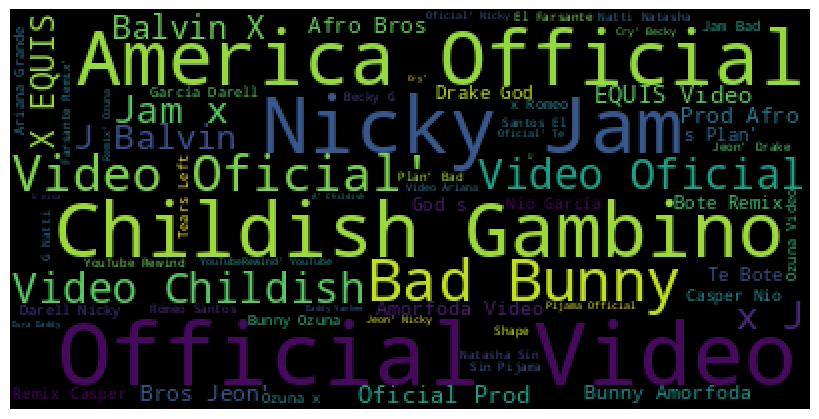

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = title1.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
description1 = cluster1['description']
description1

5935     YouTube Rewind 2017. Celebrating the videos, p...
6181     YouTube Rewind 2017. Celebrating the videos, p...
34708    No Tears Left To Cry (Official Video)Song Avai...
34888    Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
35265    “This is America” by Childish Gambino http://s...
                               ...                        
37705    “This is America” by Childish Gambino http://s...
37879    “This is America” by Childish Gambino http://s...
38056    “This is America” by Childish Gambino http://s...
38235    “This is America” by Childish Gambino http://s...
38401    “This is America” by Childish Gambino http://s...
Name: description, Length: 204, dtype: object

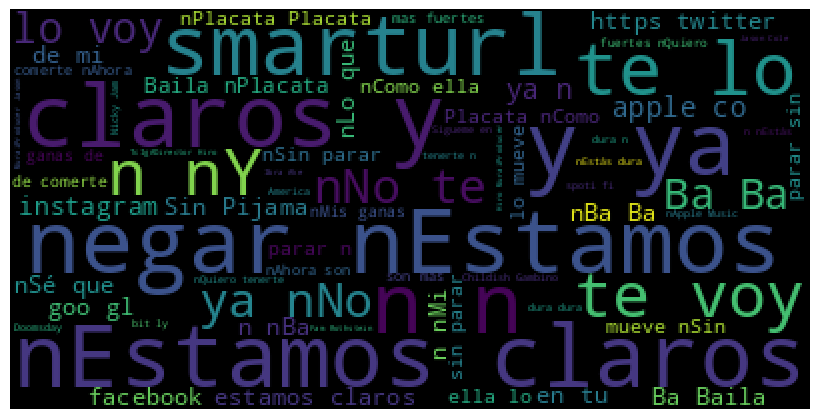

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = description1.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
cluster1['trending_date'] = pd.to_datetime(cluster1['trending_date'], errors='coerce', format='%y.%d.%m')
cluster1['publish_time'] = pd.to_datetime(cluster1['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

<ipython-input-41-9ccdffeb62ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['trending_date'] = pd.to_datetime(cluster1['trending_date'], errors='coerce', format='%y.%d.%m')
<ipython-input-41-9ccdffeb62ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['publish_time'] = pd.to_datetime(cluster1['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')


Text(0.5, 1.0, 'Publish_time')

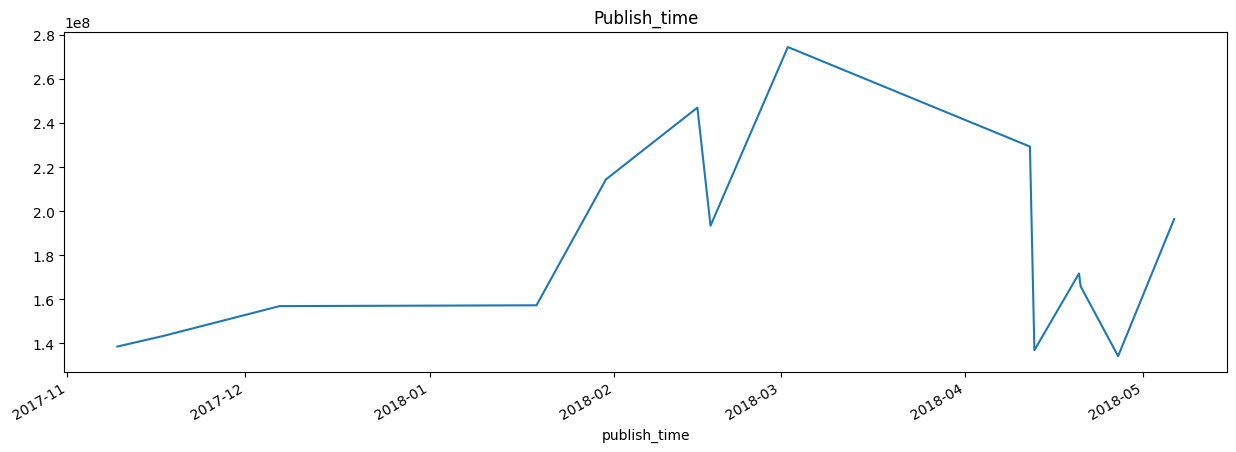

In [ ]:
import matplotlib.pyplot as plt

select_pd = cluster1[['publish_time','views']]
fig, ax = plt.subplots(figsize=(15,5))

# Use ax1 to plot publish_time
select_pd.groupby(['publish_time']).mean()['views'].plot(x='date', y='view', legend=False, ax=ax)
ax.set_title("Publish_time")
